# Image Recognition Hama Hydrangea (Deteksi Hama)

## Import Package

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from jcopdl.callback import Callback, set_config

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

## Dataset dan Dataloader

In [2]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [3]:
bs = 128
crop_size = 64 #jika image ukurannya berbeda-beda (crop&resize)

train_transform = transforms.Compose([
    transforms.RandomRotation(15), # 15 derajat
    transforms.RandomResizedCrop(crop_size, scale=(0.8, 1.0)), # cropnya jangan terlalu kecil, 80%-100% dari gambar baru di resize
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(70),
    transforms.CenterCrop(crop_size),
    transforms.ToTensor()
])

train_set = datasets.ImageFolder("data-hama/train/", transform=train_transform)
trainloader = DataLoader(train_set, batch_size=bs, shuffle=True, num_workers=4)

test_set = datasets.ImageFolder("data-hama/test/", transform=test_transform)
testloader = DataLoader(test_set, batch_size=bs, shuffle=True)

In [4]:
image, label = next(iter(trainloader))
image.shape

torch.Size([128, 3, 64, 64])

In [5]:
label2cat = train_set.classes
label2cat

['invasive', 'noninvasive']

## Arsitektur dan Config

In [6]:
from jcopdl.layers import linear_block, conv_block

In [7]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.convolutional = nn.Sequential(
            
            conv_block(3, 8),
            conv_block(8, 16),
            conv_block(16, 32),
            conv_block(32, 64),
            nn.Flatten()
            
        )
        
        self.fc = nn.Sequential(
            
            linear_block(64*4*4, 256, dropout=0.10),
            linear_block(256, 2, activation='lsoftmax')
        )
        
        
        
    def forward(self, x):
        x = self.convolutional(x)
        x = self.fc(x)
        return x
        

In [8]:
config = set_config ({
    
    "batch_size" : bs,
    "crop_size" : crop_size,
    "author" : "Ridho Alhafizhi"
      
})

## Training Preparation >> MCOC

In [9]:
model = CNN().to(device)
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model, outdir="model-hama")

In [10]:
model

CNN(
  (convolutional): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (3): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (4): Flatten()
  )
  (fc): Sequential(
    (0): Sequential(
      (0): Linear(in_features=1024, out_features=256, bias=True)
      

## Training

In [11]:
from tqdm.auto import tqdm



Epoch     1
Train_cost  = 0.6857 | Test_cost  = 0.6610 | Train_score = 0.5490 | Test_score = 0.6650 |




Epoch     2
Train_cost  = 0.6324 | Test_cost  = 0.6122 | Train_score = 0.6610 | Test_score = 0.6725 |




Epoch     3
Train_cost  = 0.5896 | Test_cost  = 0.6122 | Train_score = 0.6940 | Test_score = 0.6625 |
==> EarlyStop patience =  1 | Best test_score: 0.6725




Epoch     4
Train_cost  = 0.5742 | Test_cost  = 0.5654 | Train_score = 0.7170 | Test_score = 0.7075 |




Epoch     5
Train_cost  = 0.5416 | Test_cost  = 0.5208 | Train_score = 0.7310 | Test_score = 0.7450 |




Epoch     6
Train_cost  = 0.5283 | Test_cost  = 0.5067 | Train_score = 0.7410 | Test_score = 0.7800 |




Epoch     7
Train_cost  = 0.4859 | Test_cost  = 0.4617 | Train_score = 0.7720 | Test_score = 0.7875 |




Epoch     8
Train_cost  = 0.4665 | Test_cost  = 0.5176 | Train_score = 0.7850 | Test_score = 0.7300 |
==> EarlyStop patience =  1 | Best test_score: 0.7875




Epoch     9
Train_cost  = 0.4806 | Test_cost  = 0.4614 | Train_score = 0.7660 | Test_score = 0.7650 |
==> EarlyStop patience =  2 | Best test_score: 0.7875




Epoch    10
Train_cost  = 0.4431 | Test_cost  = 0.4194 | Train_score = 0.7940 | Test_score = 0.8100 |




Epoch    11
Train_cost  = 0.4052 | Test_cost  = 0.4051 | Train_score = 0.8260 | Test_score = 0.8200 |




Epoch    12
Train_cost  = 0.4013 | Test_cost  = 0.3909 | Train_score = 0.8110 | Test_score = 0.8250 |




Epoch    13
Train_cost  = 0.4017 | Test_cost  = 0.3930 | Train_score = 0.8190 | Test_score = 0.8250 |
==> EarlyStop patience =  1 | Best test_score: 0.8250




Epoch    14
Train_cost  = 0.3804 | Test_cost  = 0.3587 | Train_score = 0.8230 | Test_score = 0.8525 |




Epoch    15
Train_cost  = 0.3724 | Test_cost  = 0.3548 | Train_score = 0.8350 | Test_score = 0.8600 |




Epoch    16
Train_cost  = 0.3664 | Test_cost  = 0.3500 | Train_score = 0.8400 | Test_score = 0.8375 |
==> EarlyStop patience =  1 | Best test_score: 0.8600




Epoch    17
Train_cost  = 0.3687 | Test_cost  = 0.3545 | Train_score = 0.8440 | Test_score = 0.8525 |
==> EarlyStop patience =  2 | Best test_score: 0.8600




Epoch    18
Train_cost  = 0.3567 | Test_cost  = 0.3777 | Train_score = 0.8350 | Test_score = 0.8275 |
==> EarlyStop patience =  3 | Best test_score: 0.8600




Epoch    19
Train_cost  = 0.3353 | Test_cost  = 0.3430 | Train_score = 0.8550 | Test_score = 0.8550 |
==> EarlyStop patience =  4 | Best test_score: 0.8600




Epoch    20
Train_cost  = 0.3569 | Test_cost  = 0.3385 | Train_score = 0.8450 | Test_score = 0.8500 |


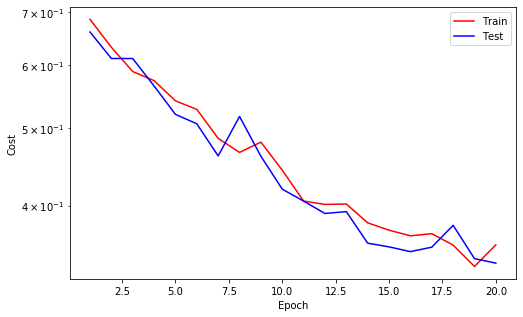

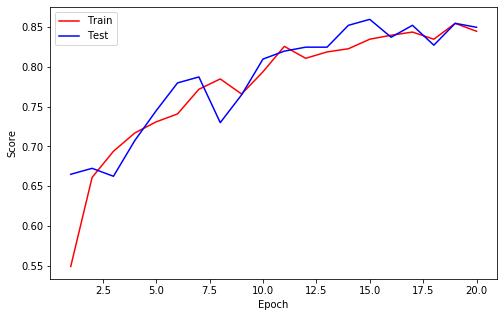

==> EarlyStop patience =  5 | Best test_score: 0.8600
==> Execute Early Stopping at epoch: 20 | Best test_score: 0.8600
==> Best model is saved at model-hama


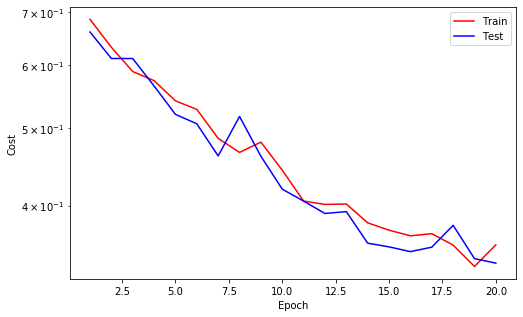

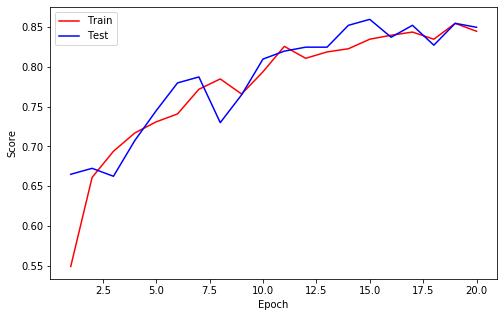

In [12]:
while True:
    model.train()
    cost = correct = 0
    for feature, target in tqdm(trainloader, desc='<< Training >> '):
        feature, target = feature.to(device), target.to(device)
        
        output = model(feature)
        loss = criterion(output, target)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()
        
        cost += loss.item()*feature.shape[0]
        correct += (output.argmax(1) == target).sum().item()
    train_cost = cost/len(train_set)
    train_score = correct/len(train_set)
    
    with torch.no_grad():
        model.eval()
        cost = correct = 0
        for feature, target in tqdm(testloader, desc='<< Testing >> '):
            feature, target = feature.to(device), target.to(device)
        
            output = model(feature)
            loss = criterion(output, target)
            
            cost += loss.item()*feature.shape[0]
            correct += (output.argmax(1) == target).sum().item()
        test_cost = cost/len(test_set)
        test_score = correct/len(test_set)

    # Logging
    callback.log(train_cost, test_cost, train_score, test_score)

    # Checkpoint
    callback.save_checkpoint()
        
    # Runtime Plotting
    callback.cost_runtime_plotting()
    callback.score_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_score"):
        callback.plot_cost()
        callback.plot_score()
        break

## Evaluasi Model

### Confusion Matrix

In [116]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score, auc
import itertools

Precision score: 0.860000
Recall score: 0.920000
F1 score: 0.860000
Accuracy score: 0.860000


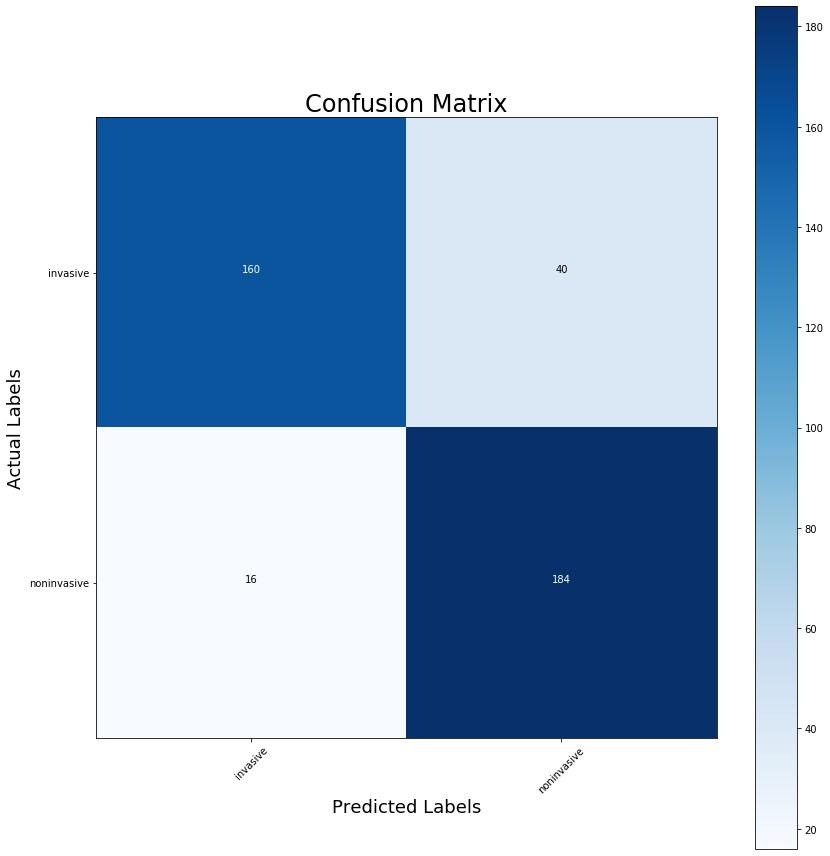

In [126]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        cm
    
    plt.imshow(cm, interpolation=None, cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.title('Confusion Matrix', fontsize=24)
    plt.ylabel('Actual Labels', fontsize=18)
    plt.xlabel('Predicted Labels',fontsize=18)
    

# Graphical analytics
def predictionsplot(model, device, testloader):
        model.eval()
        actuals = []
        predictions = []
        with torch.no_grad():
            for images, labels in testloader:
                images, labels = images.to(device), labels.to(device)
                output = model(images)
                prediction = output.argmax(dim=1, keepdim=True)
                actuals.extend(labels.view_as(prediction))
                predictions.extend(prediction)
        return [i.item() for i in actuals], [i.item() for i in predictions]

actuals, predictions = predictionsplot(model, device, testloader)
cm = confusion_matrix(actuals, predictions)
names = (train_set.classes)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cm, names)

print('Precision score: %f' %precision_score(actuals, predictions, average='micro'))
print('Recall score: %f' %recall_score(actuals, predictions))
print('F1 score: %f' % f1_score(actuals, predictions, average='micro'))
print('Accuracy score: %f' % accuracy_score(actuals, predictions))

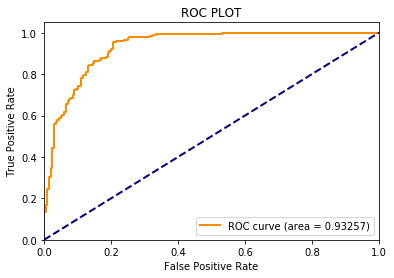

In [118]:
def test_class_probabilities(model, device, testloader, which_class):
    model.eval()
    actuals = []
    probabilities = []
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            output = model(images)
            prediction = output.argmax(dim=1, keepdim=True)
            actuals.extend(labels.view_as(prediction) == which_class)
            probabilities.extend(np.exp(output[:, which_class]))
    return [i.item() for i in actuals], [i.item() for i in probabilities]

which_class = 1
actuals, class_probabilities = test_class_probabilities(model, device, testloader, which_class)

fpr, tpr, _ = roc_curve(actuals, class_probabilities)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC PLOT')
plt.legend(loc="lower right")
plt.show()

## Load Model

In [89]:
weights = torch.load("model/weights_best.pth", map_location="cpu")
model.load_state_dict(weights)
model = model.to(device);

In [90]:
config = torch.load("model/configs.pth",map_location="cpu")
config

Config(author=Ridho Alhafizhi, batch_size=128, crop_size=64)

## Predict

In [103]:
images, labels = next(iter(testloader))
images, labels = images.to(device), labels.to(device)

In [104]:
with torch.no_grad():
    model.eval()
    output = model(images)
    preds = output.argmax(1)
preds

tensor([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
        1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
        0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 1, 0, 1, 0, 0])

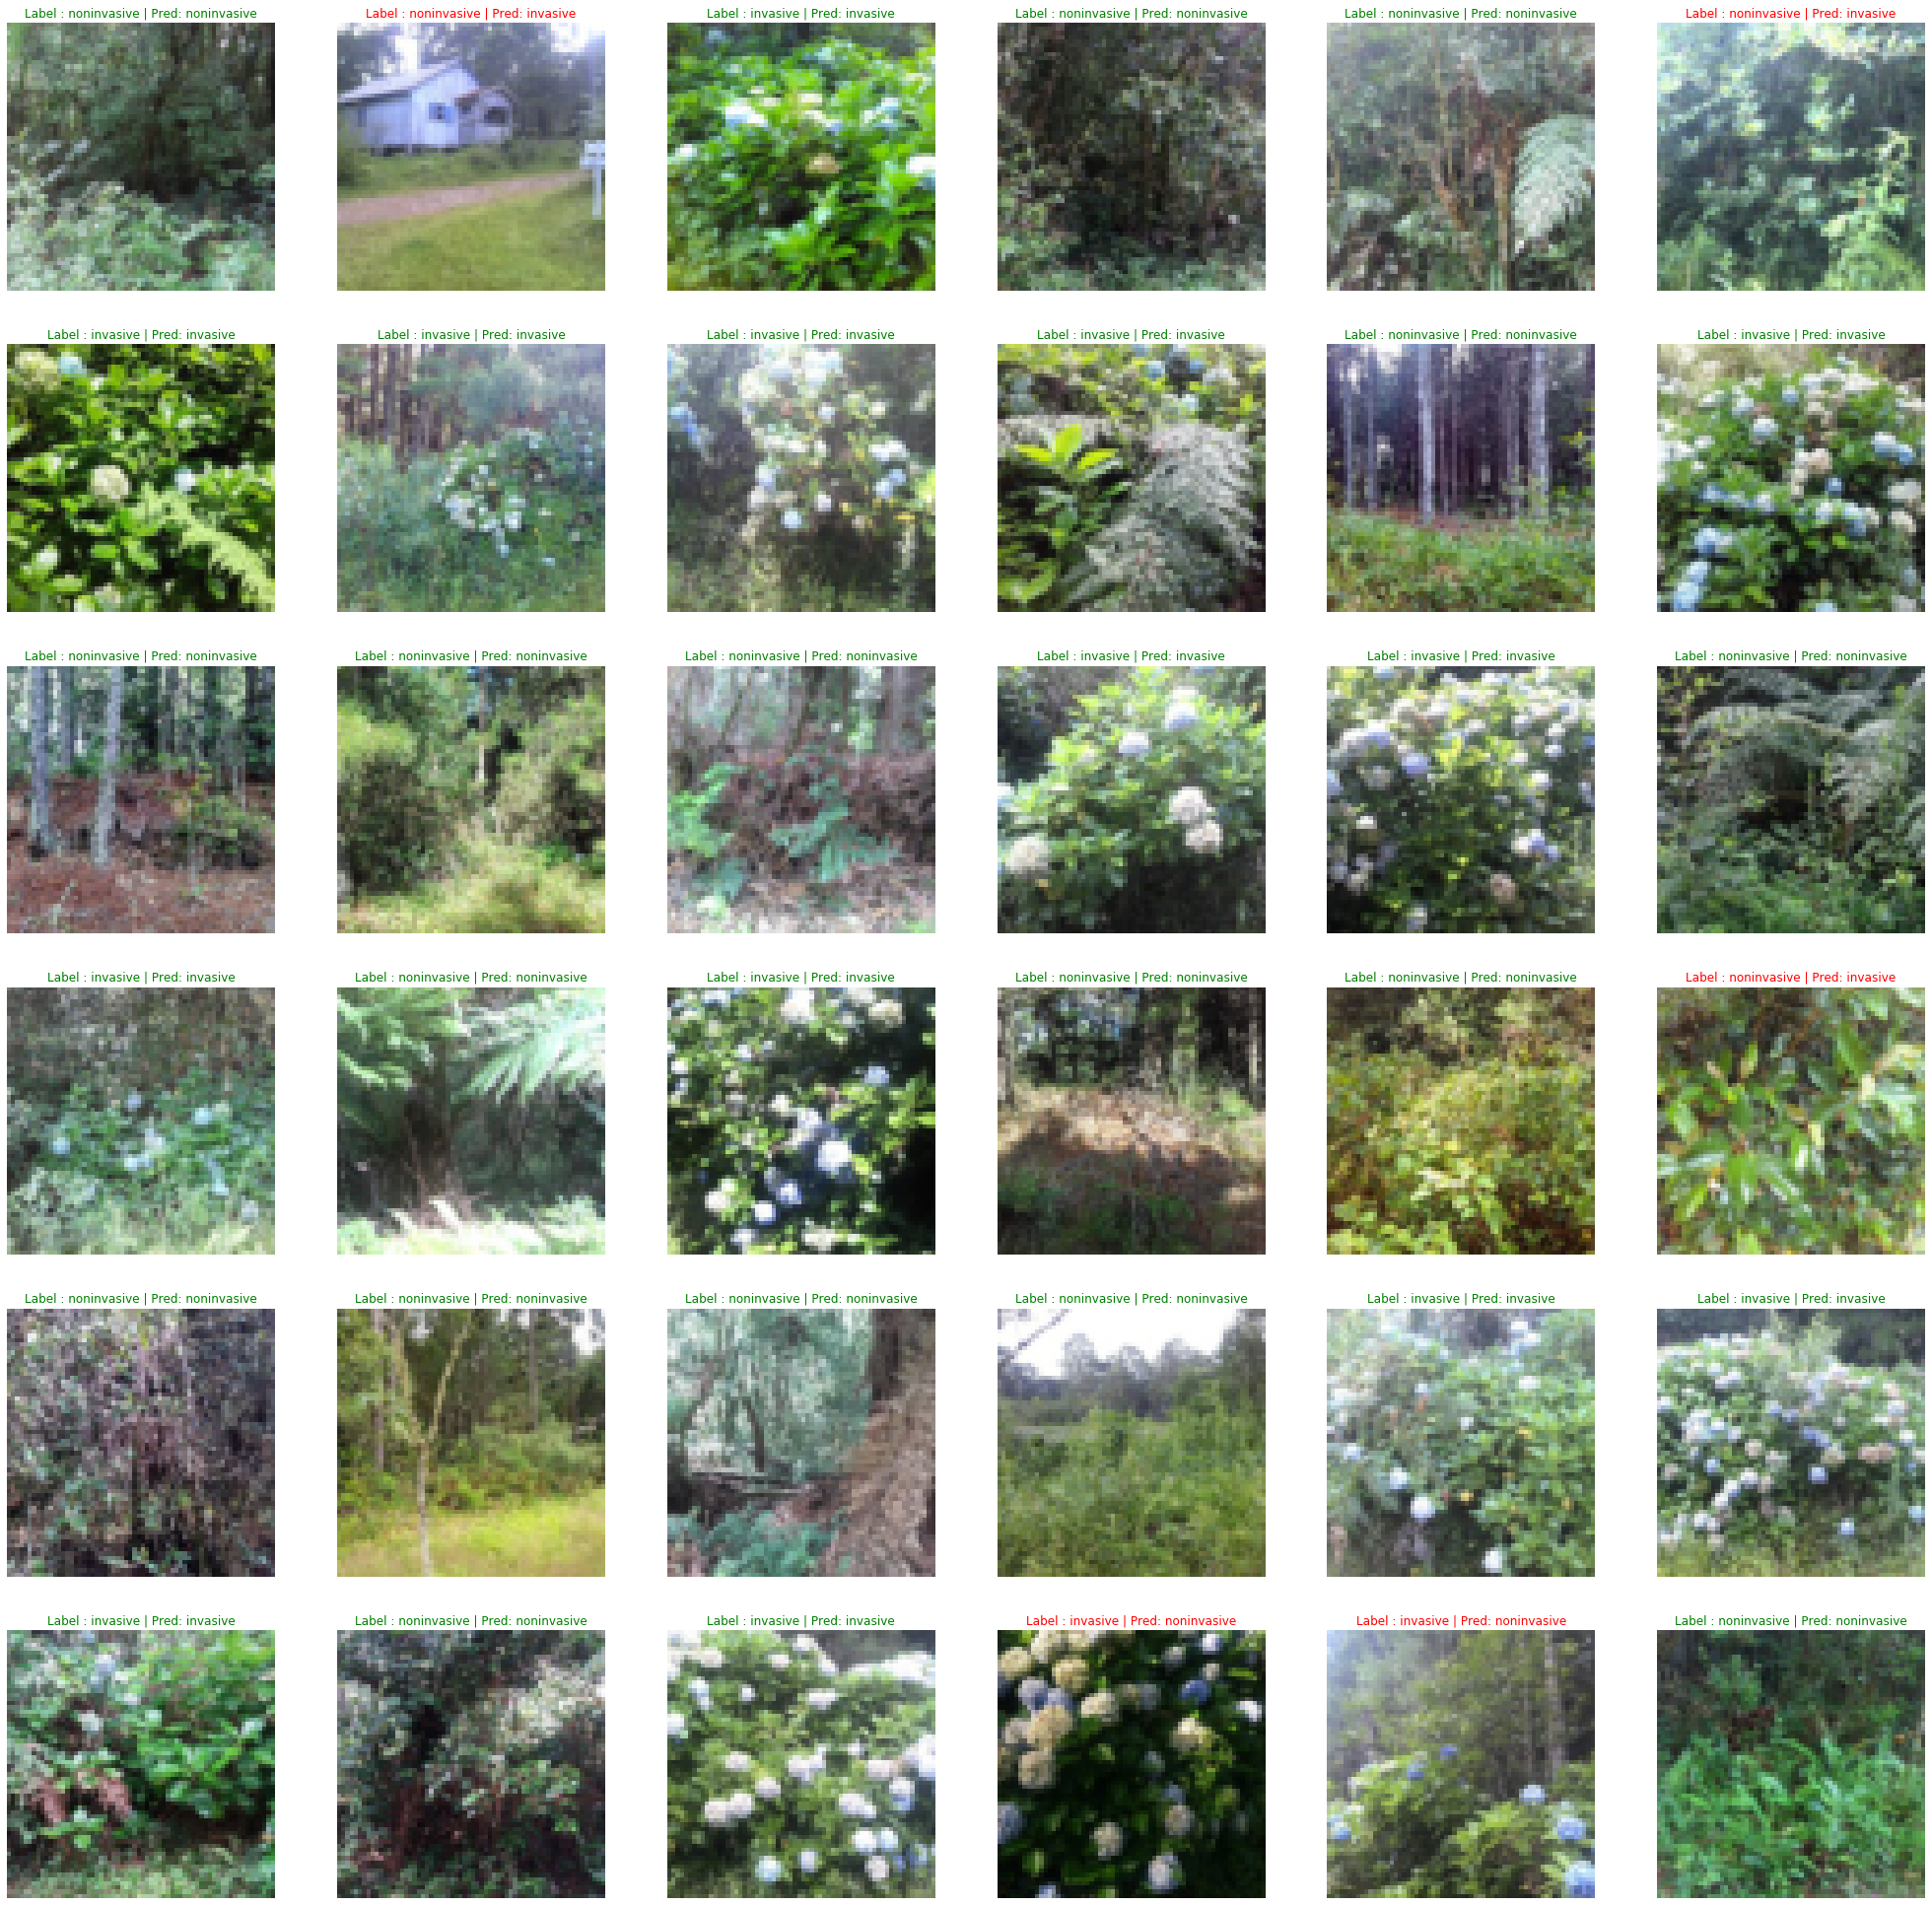

In [113]:
fig, axes = plt.subplots(6,6, figsize=(35, 35))
for img, label, pred, ax in zip(images, labels, preds, axes.flatten()):
    font = {"color" : "g"} if label == pred else {"color":"r"}
    
    ax.imshow(img.permute(1, 2, 0).cpu())
    font = {"color" : "g"} if label == pred else {"color":"r"}
    label, pred = label2cat[label.item()], label2cat[pred.item()]
    ax.set_title(f"Label : {label} | Pred: {pred}", fontdict=font)
    ax.axis("off");